In [359]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [360]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [361]:
log_data=pd.read_csv('../Datas/log_final.csv',header=None)

In [362]:
log_data

,0,1,2,3
0,research1,1592584549387,2466395400,...
1,busanmovie3,1592584552882,60429700,...
2,research5,1592584553081,47762700,...
3,research9,1592584553282,45952100,...
4,research1,1592584553459,30488300,...
...,...,...,...,...
3995,endangeredanimals1,1592585230710,26005400,...
3996,CulturalAssets,1592585230884,35342200,...
3997,busanmovie8,1592585231057,117666200,...
3998,tourguide,1592585231304,27038400,...


In [363]:
log_data.columns=['Dataset','Query Time','Execution Time','ManagerId']

In [364]:
log_data.info

<bound method DataFrame.info of                  Dataset     Query Time  Execution Time ManagerId
0              research1  1592584549387      2466395400       ...
1            busanmovie3  1592584552882        60429700       ...
2              research5  1592584553081        47762700       ...
3              research9  1592584553282        45952100       ...
4              research1  1592584553459        30488300       ...
...                  ...            ...             ...       ...
3995  endangeredanimals1  1592585230710        26005400       ...
3996      CulturalAssets  1592585230884        35342200       ...
3997         busanmovie8  1592585231057       117666200       ...
3998           tourguide  1592585231304        27038400       ...
3999  endangeredanimals1  1592585231474        25015300       ...

[4000 rows x 4 columns]>

In [365]:
log_data.describe()

,Query Time,Execution Time
count,4.000000e+03,4.000000e+03
mean,1.592585e+12,3.859154e+07
std,1.955934e+05,7.410277e+07
min,1.592585e+12,1.964520e+07
25%,1.592585e+12,2.721360e+07
50%,1.592585e+12,2.899590e+07
75%,1.592585e+12,3.109592e+07
max,1.592585e+12,2.466395e+09


In [366]:
TRAINING_DATA_SIZE=int(log_data.shape[0]*0.8)

In [367]:
Train_X=log_data[['Dataset','Query Time','Execution Time']][:TRAINING_DATA_SIZE]

In [368]:
Train_X

,Dataset,Query Time,Execution Time
0,research1,1592584549387,2466395400
1,busanmovie3,1592584552882,60429700
2,research5,1592584553081,47762700
3,research9,1592584553282,45952100
4,research1,1592584553459,30488300
...,...,...,...
3195,endangeredanimals,1592585096214,26801300
3196,CulturalAssets,1592585096359,37472000
3197,busanmovie5,1592585096524,28124600
3198,tourguide,1592585096692,27624700


In [369]:
Train_X.describe()

,Query Time,Execution Time
count,3.200000e+03,3.200000e+03
mean,1.592585e+12,3.956642e+07
std,1.569817e+05,8.188626e+07
min,1.592585e+12,1.978660e+07
25%,1.592585e+12,2.734400e+07
50%,1.592585e+12,2.907815e+07
75%,1.592585e+12,3.109908e+07
max,1.592585e+12,2.466395e+09


In [370]:
Test_X=log_data[['Dataset','Query Time','Execution Time']][TRAINING_DATA_SIZE:]

In [371]:
Test_X

,Dataset,Query Time,Execution Time
3200,Stay,1592585097002,29719400
3201,busanmovie4,1592585097166,26733700
3202,tourguide,1592585097336,27879000
3203,endangeredanimals1,1592585097497,26445600
3204,Stay,1592585097672,29919500
...,...,...,...
3995,endangeredanimals1,1592585230710,26005400
3996,CulturalAssets,1592585230884,35342200
3997,busanmovie8,1592585231057,117666200
3998,tourguide,1592585231304,27038400


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248081464C8>,
      dtype=object)

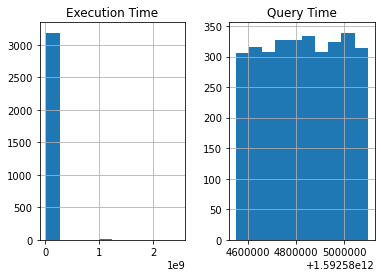

In [372]:
Train_X.hist()

In [373]:
#Dataset 별로 묶어 내는 함수
def groupingByDataset(dataset):
    query_min=dataset[['Query Time']].min()
    dataset[['Query Time']]=(dataset[['Query Time']]-query_min)
    Dataset_Query=dataset.groupby('Dataset')['Query Time'].sum().to_frame().reset_index()
    Dataset_Execution=dataset.groupby('Dataset')['Execution Time'].mean().to_frame().reset_index()
    Dataset_Query_Frequency=dataset.groupby('Dataset')['Query Time'].count().to_frame().reset_index()
    Dataset_Query_Frequency.rename(columns = {'Query Time' : 'Query Count'}, inplace = True)
    dataset=pd.merge(Dataset_Query,Dataset_Execution,on='Dataset')
    dataset=pd.merge(dataset,Dataset_Query_Frequency,on='Dataset')
    return dataset

In [374]:
#Dataset을 전처리하는 함수
def dataPreprocessing(dataset):
    execute_mean=dataset[['Execution Time']].mean()
    execute_std=dataset[['Execution Time']].std()
    dataset[['Execution Time']]=(dataset[['Execution Time']]-execute_mean)/execute_std
    count_mean=dataset[['Query Count']].mean()
    count_std=dataset[['Query Count']].std()
    dataset[['Query Count']]=(dataset[['Query Count']]-count_mean)/count_std
    query_mean=dataset[['Query Time']].mean()
    query_std=dataset[['Query Time']].std()
    dataset[['Query Time']]=(dataset[['Query Time']]-query_mean) / query_std
    return dataset

In [375]:
def dropOutliars(dataset):
    outliar_removed_index=dataset[dataset[['Execution Time']]<2]['Execution Time'].dropna().index
    dataset=dataset.iloc[outliar_removed_index]
    outliar_removed_index=dataset[dataset[['Query Count']]<2]['Query Count'].dropna().index
    dataset=dataset.iloc[outliar_removed_index]
    outliar_removed_index=dataset[dataset[['Query Time']]<2]['Query Time'].dropna().index
    dataset=dataset.iloc[outliar_removed_index]
    return datase

In [376]:
outliar_removed_index=Train_X[Train_X[['Execution Time']]<2000000000]['Execution Time'].dropna().index
Train_X=Train_X.iloc[outliar_removed_index]
Train_X=dataPreprocessing(groupingByDataset(Train_X))

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [377]:
Train_X

,Dataset,Query Time,Execution Time,Query Count
0,CinemaMap,-0.938736,-0.483698,-0.944964
1,Cinemap,-0.173102,-0.396728,-0.342840
2,CulturalAssets,-0.166148,-0.187231,-0.342840
3,ETCCutSlope,-0.887429,-0.023372,-0.907331
4,Exhibit,-0.938016,0.250721,-0.944964
5,ExhibitionArea,-0.341848,-0.463379,-0.342840
6,ExperienceTour,-0.906416,2.117898,-0.907331
7,Gallery,-0.925587,-0.492996,-0.944964
8,GeneralStructureCutSlope,-0.950403,-0.411226,-0.944964
9,GenreClassificationRule,-0.891299,-0.566836,-0.944964


In [378]:
Test_X=dataPreprocessing(groupingByDataset(Test_X))

In [379]:
Train_X

,Dataset,Query Time,Execution Time,Query Count
0,CinemaMap,-0.938736,-0.483698,-0.944964
1,Cinemap,-0.173102,-0.396728,-0.342840
2,CulturalAssets,-0.166148,-0.187231,-0.342840
3,ETCCutSlope,-0.887429,-0.023372,-0.907331
4,Exhibit,-0.938016,0.250721,-0.944964
5,ExhibitionArea,-0.341848,-0.463379,-0.342840
6,ExperienceTour,-0.906416,2.117898,-0.907331
7,Gallery,-0.925587,-0.492996,-0.944964
8,GeneralStructureCutSlope,-0.950403,-0.411226,-0.944964
9,GenreClassificationRule,-0.891299,-0.566836,-0.944964


In [380]:
Test_X

,Dataset,Query Time,Execution Time,Query Count
0,CinemaMap,-1.003736,-0.536246,-0.879388
1,Cinemap,-0.071725,-0.393497,-0.493868
2,CulturalAssets,-0.051271,-0.138329,-0.493868
3,Exhibit,-0.998932,0.337310,-0.879388
4,ExhibitionArea,-0.578912,-0.358188,-0.622375
5,Gallery,-0.985913,-0.518655,-0.879388
6,LocationInBusan1,-0.061594,0.977073,-0.493868
7,LocationInBusan2,-0.586670,-0.378654,-0.622375
8,LuxuryTour,-0.158305,-0.420305,-0.236855
9,MemorialHall,-1.001370,-0.544017,-0.879388


In [381]:
colds

[21, 22, 23, 24, 25, 33, 34, 35, 36, 37, 39, 40, 41, 42, 47, 48, 49, 50]

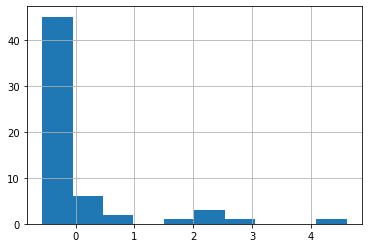

In [382]:
Train_X['Execution Time'].hist()

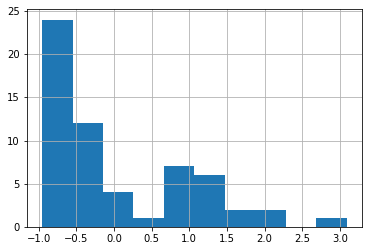

In [383]:
Train_X['Query Time'].hist()

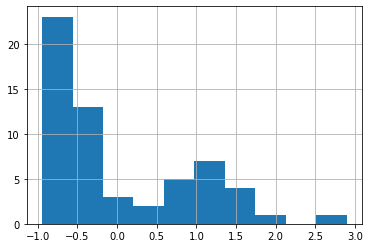

In [384]:
Train_X['Query Count'].hist()

In [200]:
#hot_index 추출하는 함수
def hotIndex(dataset):
    Hot_Dataset_Counts=round(len(dataset)*0.3)
    query_hot=set(dataset[dataset['Query Time']>dataset['Query Time'].mean()].index)
    execution_hot=set(dataset[dataset['Execution Time']>dataset['Execution Time'].mean()].index)
    count_hot=set(dataset[dataset['Query Count']>dataset['Query Count'].mean()].index)
    hot_index=[]

    # Query Time and Execution Time and Query Count
    intersect=query_hot.intersection(execution_hot).intersection(count_hot)
    hot_index=[data for data in intersect]

    intersects=[]
    #Query Time and Query Count
    intersects.extend(query_hot.intersection(count_hot))
    #Execution Time and Query Count
    intersects.extend(execution_hot.intersection(count_hot))
    #Query Time and Execution Time
    intersects.extend(query_hot.intersection(execution_hot))
    while len(hot_index) < Hot_Dataset_Counts:
        data=intersects.pop(0)
        if data in hot_index:
            continue
        hot_index.append(data)
    return hot_index

In [201]:
hot_index=hotIndex(Train_X)
hot_index

[34, 58, 29, 30, 31, 32, 33, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 54]

In [202]:
Train_Y=pd.DataFrame(np.zeros(len(Train_X)))
hots=list(hot_index)
Train_Y.loc[hots]=1.0

In [203]:
hot_index=hotIndex(Test_X)
hot_index

[23, 33, 34, 35, 36, 37, 39, 40, 41, 42, 47, 48, 49, 50, 21]

In [204]:
#estData에 대해 실제 HotIndex 설정
Test_Y=Test_X[["Dataset"]]
realHotData=["busanmovie1", "busanmovie2", "busanmovie3", "busanmovie4", "busanmovie5", "endangeredanimals", "endangeredanimals1", "koreanhistory",
             "koreanhistory1", "nationalparkstatus", "nationalparkstatus1","research1", "research2", "research3", "research4", "research5", "roadkillstatus",
             "roadkillstatus1", "tourguide", "tourguide1"
            ]
target=np.zeros(len(Test_X))
indexes=[]
for index in range(len(Test_X)):
    if Test_X.loc[index,"Dataset"] in realHotData:
        indexes.append(index)
target[indexes]=1
Test_Y["Cold/Hot"]=target
Test_Y=Test_Y.drop("Dataset",axis=1)

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [205]:
Train_X=Train_X[["Query Time","Execution Time","Query Count"]]

In [206]:
Test_X=Test_X[["Query Time","Execution Time","Query Count"]]

In [207]:
Names=["Decision Tree",
       "Linear Discriminant Analysis",
       "Quadratic Discriminant Analysis",
       "Gaussian NB",
       "Gaussian ProcessClassifier",
       "ExtraTreeClassifier",
       "RidgeClassifier",
       "KNN Classifier"]

In [208]:
Classifiers=[
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    GaussianProcessClassifier(kernel=1.0*RBF(1.0)),
    ExtraTreesClassifier(),
    RidgeClassifier(),
    KNeighborsClassifier(n_neighbors = 5)
]

In [209]:
results=[]
for model in Classifiers:
    model=model.fit(Train_X,Train_Y)
    predict=model.predict(Test_X)
    results.append(round(accuracy_score(Test_Y,predict)*100))
#print("Model Name: %s \t\t\tAccuracy: %.2f" % (name, (accuracy_score(y_test, predict) * 100)),"%") # 정확도 % 계산

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

In [210]:
results

[86.0, 94.0, 92.0, 96.0, 96.0, 96.0, 92.0, 98.0]

<Figure size 864x576 with 0 Axes>

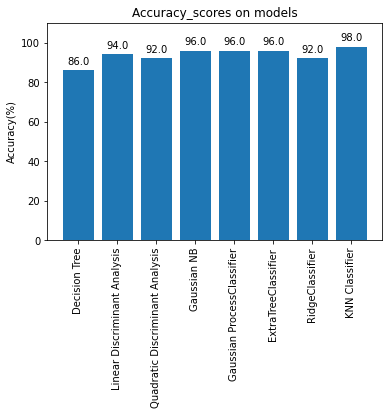

In [211]:
plt.figure(figsize=(12,8))
fig,ax=plt.subplots()
barplot=plt.bar(Names,results)
for idx,rect in enumerate(barplot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
            results[idx],
            ha='center', va='bottom', rotation=0)
plt.title('Accuracy_scores on models')
plt.ylim(0,110)
plt.ylabel('Accuracy(%)')
plt.xticks(Names,rotation=90)
plt.show()

In [212]:
hots=[x for x in range(predict.size) if predict[x]==0]
colds=[x for x in range(predict.size) if predict[x]==1]
hot_X=Test_X.loc[hots]
cold_X=Test_X.loc[colds]

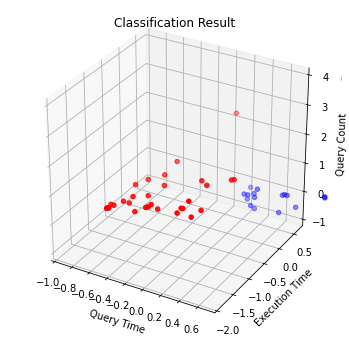

In [213]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hot_X[["Query Time"]],hot_X[["Execution Time"]],hot_X[["Query Count"]],c='red')
ax.scatter(cold_X[["Query Time"]],cold_X[["Execution Time"]],cold_X[["Query Count"]],c='blue')
ax.set_xlabel("Query Time");
ax.set_ylabel("Execution Time");
ax.set_zlabel("Query Count");
ax.set_title("Classification Result");
ax.set_xlim(-1.0,0.75)
ax.set_ylim(-2.0,0.75)
ax.set_xlim(-1.0,0.75)
plt.show()

In [220]:
colds

[21, 22, 23, 24, 25, 33, 34, 35, 36, 37, 39, 40, 41, 42, 47, 48, 49, 50]

In [215]:
Test_X

,Query Time,Execution Time,Query Count
0,-1.003736,-0.536246,-0.879388
1,-0.071725,-0.393497,-0.493868
2,-0.051271,-0.138329,-0.493868
3,-0.998932,0.337310,-0.879388
4,-0.578912,-0.358188,-0.622375
5,-0.985913,-0.518655,-0.879388
6,-0.061594,0.977073,-0.493868
7,-0.586670,-0.378654,-0.622375
8,-0.158305,-0.420305,-0.236855
9,-1.001370,-0.544017,-0.879388


In [218]:
predict.size

51